# Model Comparison

This notebook examplify how to use the functions in the py file. 

In [5]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import model_comp as mc # This one is the class in model_comp.py

folder = '../../06 - Utility & References/Data'
file = 'player_batting_enriched.csv'
index = 'player_id'
bat = pd.read_csv(folder+'/'+file, index_col=index)
train = bat[bat['year']==2021]
test = bat[bat['year']==2022]
y_train = train['hr_10'].copy()
y_test = test['hr_10'].copy()

In [6]:
def outputs(model):
    """ Quick function to get outputs in one 2x2 list"""
    return [[model.predict(X_train), model.predict(X_test)], [model.predict_proba(X_train)[:,1], model.predict_proba(X_test)[:,1]]]

# Model 1 - Logistic Regression without the variable that contains missing
X_train = train[['ab', 'batting_avg','r_total_stolen_base']].copy()
X_test = test[['ab', 'batting_avg','r_total_stolen_base']].copy()
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1_outputs = outputs(model1)

# Model 2 - KNN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
model2_outputs = outputs(model2)

# Model 3 - Logistic Regression with missing imputation
X_train = train[['ab','exit_velocity_avg', 'batting_avg','r_total_stolen_base']].copy()
X_train['exit_velocity_avg'] = X_train['exit_velocity_avg'].fillna(X_train['exit_velocity_avg'].median())
X_test = test[['ab','exit_velocity_avg', 'batting_avg','r_total_stolen_base']].copy()
X_test['exit_velocity_avg'] = X_test['exit_velocity_avg'].fillna(X_test['exit_velocity_avg'].median())
model3 = LogisticRegression()
model3.fit(X_train, y_train)
model3_outputs = outputs(model3)

# Model 4 - Decision Tree
model4 = DecisionTreeClassifier(max_depth=3, min_samples_split=30, min_samples_leaf = 20, max_features=3)
model4.fit(X_train, y_train)
model4_outputs = outputs(model4)

# Model 5 - Random Forest
model5 = RandomForestClassifier(random_state=42)
model5.fit(X_train,y_train)
model5_outputs = outputs(model5)


To initialize the problem you can call the class using the name of the problem you are predicting, the model outputs as a dictionary of models and 2D list of predictions for each data set and a 1D list of actual values for each data set.

In [7]:
model_dict = {'Logistic Regression No Imp': model1_outputs, 'KNN': model2_outputs, 'Logistic Regression Imp': model3_outputs,
              'Decision Tree': model4_outputs, 'Random Forest': model5_outputs }
y_actual = [y_train, y_test]

problem = mc.problem("2022 Home Runs", model_dict, y_actual)

stat_table creates a table with each stat:

In [8]:
problem.stat_table()

,model_name,ds,acc,miss,precision_1,precision_0,recall_1,recall_0,f1_1,f1_0,roc_auc,ase,log_loss_value
0,Logistic Regression No Imp,Train,0.881148,0.118852,0.830918,0.900952,0.767857,0.931102,0.798144,0.915779,0.948239,0.085915,0.276115
1,Logistic Regression No Imp,Test,0.854037,0.145963,0.741228,0.915865,0.828431,0.865909,0.782407,0.890187,0.933946,0.102356,0.318521
2,KNN,Train,0.900273,0.099727,0.835556,0.928994,0.839286,0.927165,0.837416,0.928079,0.965248,0.067923,0.204159
3,KNN,Test,0.838509,0.161491,0.692308,0.937500,0.882353,0.818182,0.775862,0.873786,0.900847,0.122174,1.899749
4,Logistic Regression Imp,Train,0.887978,0.112022,0.838095,0.908046,0.785714,0.933071,0.811060,0.920388,0.957563,0.077813,0.243255
5,Logistic Regression Imp,Test,0.877329,0.122671,0.775330,0.932854,0.862745,0.884091,0.816705,0.907818,0.950758,0.084601,0.270096
6,Decision Tree,Train,0.892077,0.107923,0.834101,0.916505,0.808036,0.929134,0.820862,0.922776,0.959729,0.070792,0.220297
7,Decision Tree,Test,0.835404,0.164596,0.707627,0.909314,0.818627,0.843182,0.759091,0.875000,0.918756,0.106149,0.380260
8,Random Forest,Train,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.011720,0.064243
9,Random Forest,Test,0.863354,0.136646,0.754386,0.923077,0.843137,0.872727,0.796296,0.897196,0.942781,0.091149,0.334860


stat_table_transposed shows the same table but with data sets in columns: 

In [9]:
problem.stat_table_transposed()

,model_name,Test_acc,Test_ase,Test_f1_0,Test_f1_1,Test_log_loss_value,Test_miss,Test_precision_0,Test_precision_1,Test_recall_0,...,Train_ase,Train_f1_0,Train_f1_1,Train_log_loss_value,Train_miss,Train_precision_0,Train_precision_1,Train_recall_0,Train_recall_1,Train_roc_auc
0,Decision Tree,0.835404,0.106149,0.875000,0.759091,0.380260,0.164596,0.909314,0.707627,0.843182,...,0.070792,0.922776,0.820862,0.220297,0.107923,0.916505,0.834101,0.929134,0.808036,0.959729
1,KNN,0.838509,0.122174,0.873786,0.775862,1.899749,0.161491,0.937500,0.692308,0.818182,...,0.067923,0.928079,0.837416,0.204159,0.099727,0.928994,0.835556,0.927165,0.839286,0.965248
2,Logistic Regression Imp,0.877329,0.084601,0.907818,0.816705,0.270096,0.122671,0.932854,0.775330,0.884091,...,0.077813,0.920388,0.811060,0.243255,0.112022,0.908046,0.838095,0.933071,0.785714,0.957563
3,Logistic Regression No Imp,0.854037,0.102356,0.890187,0.782407,0.318521,0.145963,0.915865,0.741228,0.865909,...,0.085915,0.915779,0.798144,0.276115,0.118852,0.900952,0.830918,0.931102,0.767857,0.948239
4,Random Forest,0.863354,0.091149,0.897196,0.796296,0.334860,0.136646,0.923077,0.754386,0.872727,...,0.011720,1.000000,1.000000,0.064243,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


If you want a better visualization of values with highlighted best models you can use show_table:

In [10]:
problem.show_fit_statistics_table()

,model_name,Test_acc,Test_ase,Test_f1_0,Test_f1_1,Test_log_loss_value,Test_miss,Test_precision_0,Test_precision_1,Test_recall_0,Test_recall_1,Test_roc_auc,Train_acc,Train_ase,Train_f1_0,Train_f1_1,Train_log_loss_value,Train_miss,Train_precision_0,Train_precision_1,Train_recall_0,Train_recall_1,Train_roc_auc
0,Decision Tree,0.835404,0.106149,0.875000,0.759091,0.380260,0.164596,0.909314,0.707627,0.843182,0.818627,0.918756,0.892077,0.070792,0.922776,0.820862,0.220297,0.107923,0.916505,0.834101,0.929134,0.808036,0.959729
1,KNN,0.838509,0.122174,0.873786,0.775862,1.899749,0.161491,0.937500,0.692308,0.818182,0.882353,0.900847,0.900273,0.067923,0.928079,0.837416,0.204159,0.099727,0.928994,0.835556,0.927165,0.839286,0.965248
2,Logistic Regression Imp,0.877329,0.084601,0.907818,0.816705,0.270096,0.122671,0.932854,0.775330,0.884091,0.862745,0.950758,0.887978,0.077813,0.920388,0.811060,0.243255,0.112022,0.908046,0.838095,0.933071,0.785714,0.957563
3,Logistic Regression No Imp,0.854037,0.102356,0.890187,0.782407,0.318521,0.145963,0.915865,0.741228,0.865909,0.828431,0.933946,0.881148,0.085915,0.915779,0.798144,0.276115,0.118852,0.900952,0.830918,0.931102,0.767857,0.948239
4,Random Forest,0.863354,0.091149,0.897196,0.796296,0.334860,0.136646,0.923077,0.754386,0.872727,0.843137,0.942781,1.000000,0.011720,1.000000,1.000000,0.064243,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The next function plots the fit statistics for a specific data set:

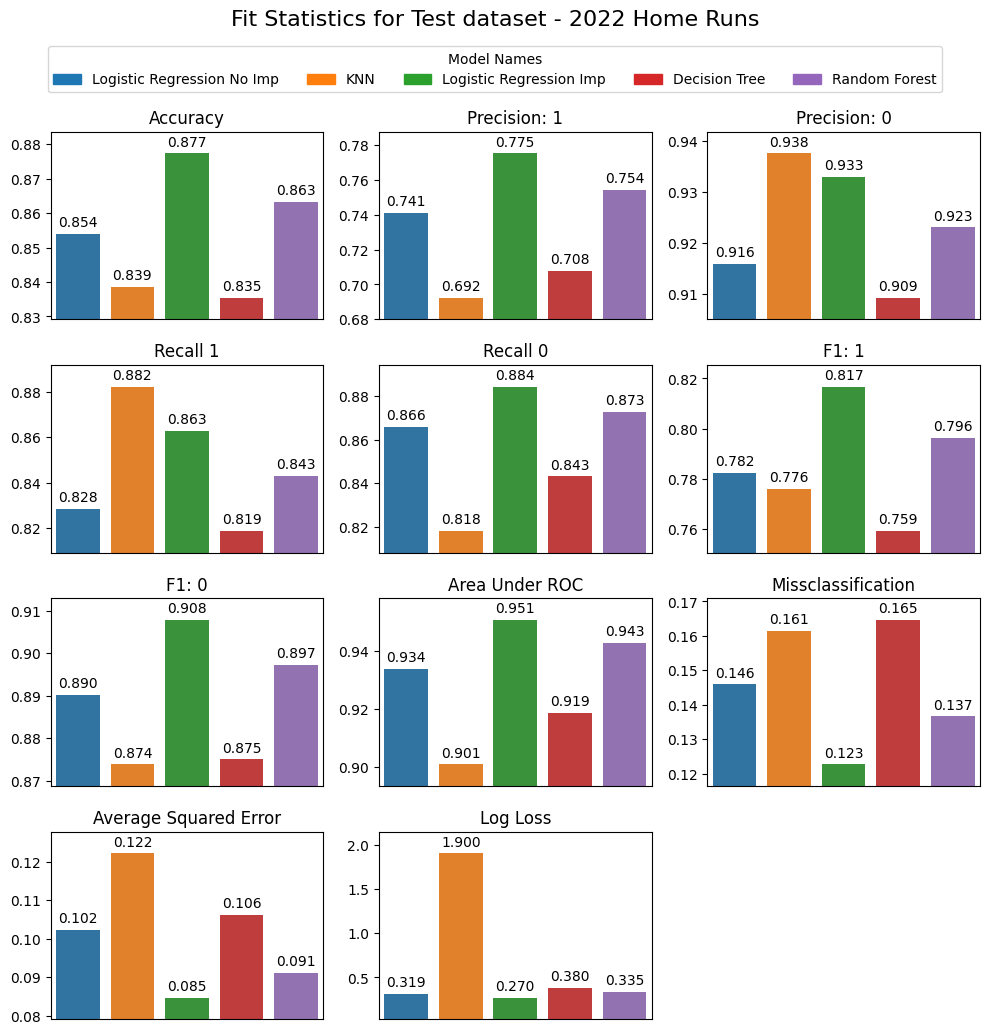

In [11]:
problem.show_fit_statistics_graphs('Test')

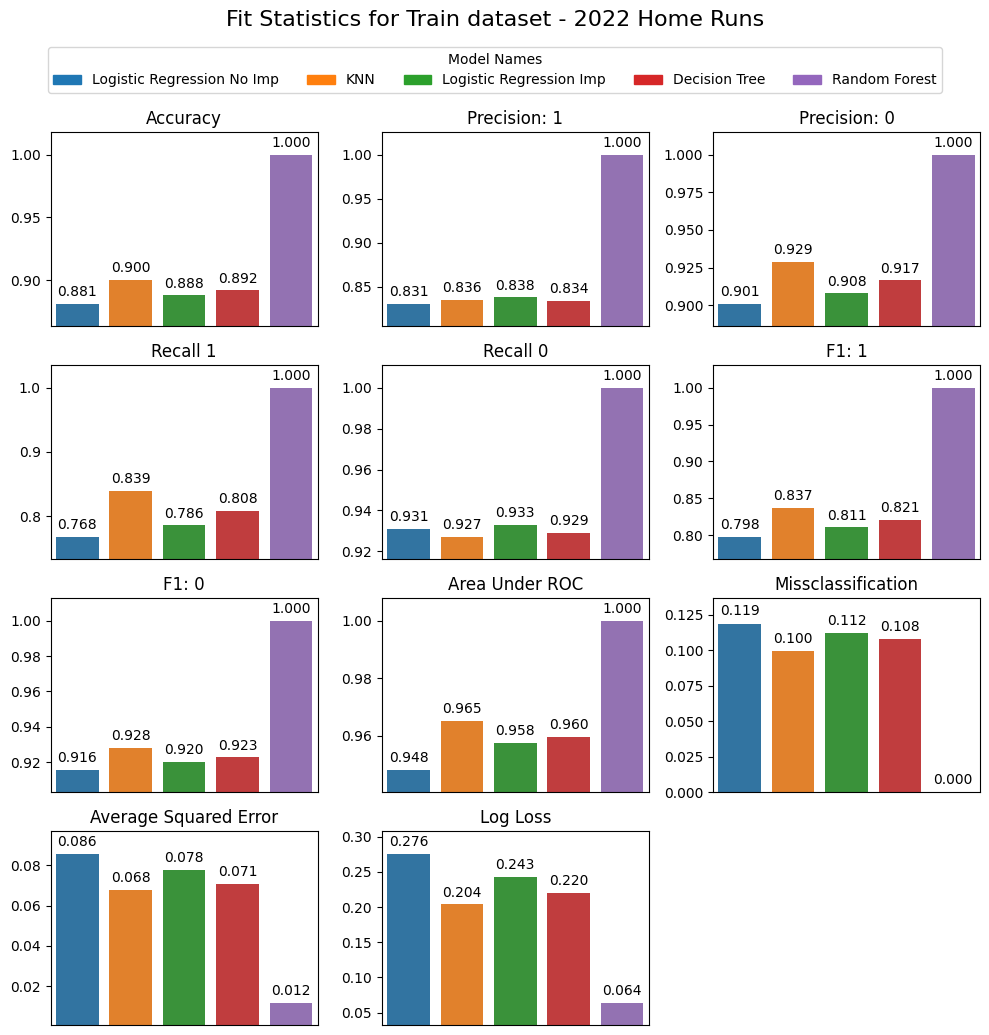

In [12]:
problem.show_fit_statistics_graphs('Train')

The next function can be used to compare ROC Curves accross all datasets:

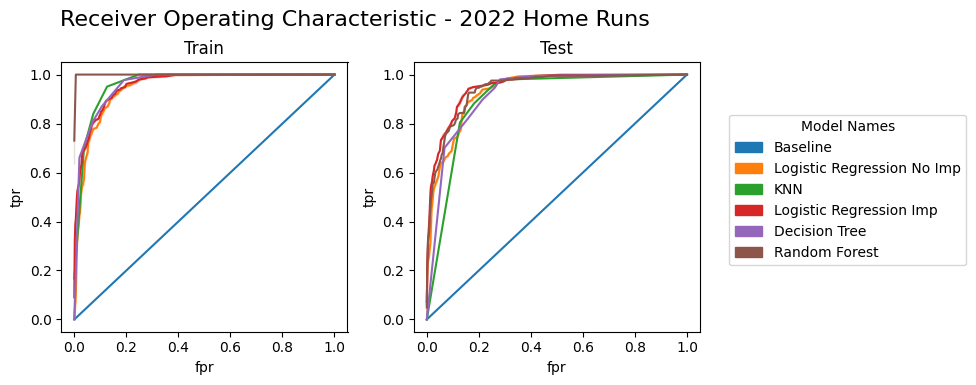

In [13]:
problem.all_roc_plot()

If you want to see the area under the curve you can use the next function:

In [14]:
problem.show_roc_auc_table()

,model_name,Test_roc_auc,Train_roc_auc
0,Decision Tree,0.918756,0.959729
1,KNN,0.900847,0.965248
2,Logistic Regression Imp,0.950758,0.957563
3,Logistic Regression No Imp,0.933946,0.948239
4,Random Forest,0.942781,1.000000


If you need an individual ROC curve, you can use the next function:

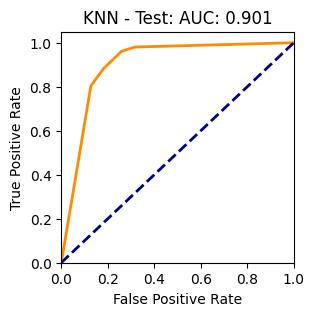

In [15]:
problem.roc_plot('KNN','Test')